In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [30]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

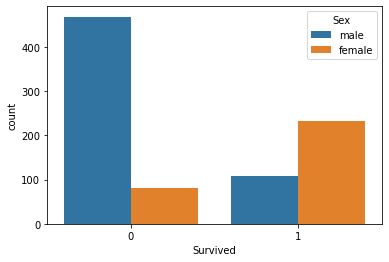

In [32]:
sns.countplot(x='Survived',hue='Sex',data=data)

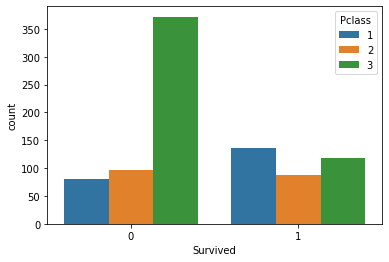

In [33]:
sns.countplot(x='Survived',hue='Pclass',data=data)

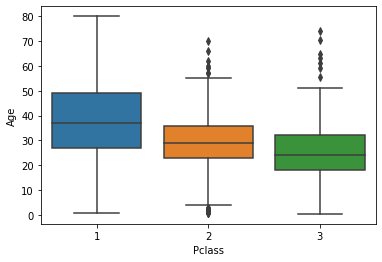

In [34]:
sns.boxplot('Pclass','Age',data=data)

In [40]:
def compute_age(df):
    age=df[0]
    Pclass=df[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 25
    else:
        return age

In [41]:
data['Age']=data[['Age','Pclass']].apply(compute_age,axis=1)

In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

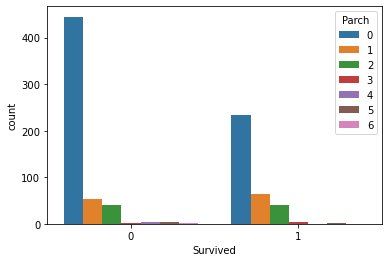

In [43]:
sns.countplot(x='Survived',hue='Parch',data=data)

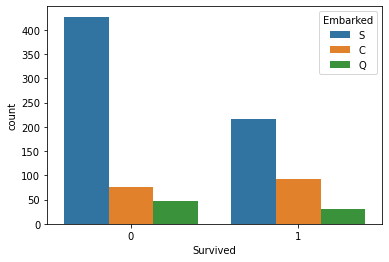

In [44]:
sns.countplot(x='Survived',hue='Embarked',data=data)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
Em=pd.get_dummies(data['Embarked'],drop_first=True)

In [50]:
data.drop(labels=['Sex','Embarked','PassengerId','Cabin','Name','Fare'],axis=1,inplace=True)

In [52]:
data.drop(['Ticket'],axis=1,inplace=True)

In [53]:
data.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,25.0,1,0
1,1,1,37.0,1,0
2,1,3,25.0,0,0
3,1,1,37.0,1,0
4,0,3,25.0,0,0


In [55]:
data=pd.concat([data,sex,Em],axis=1)

In [56]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,25.0,1,0,1,0,1
1,1,1,37.0,1,0,0,0,0
2,1,3,25.0,0,0,0,0,1
3,1,1,37.0,1,0,0,0,1
4,0,3,25.0,0,0,1,0,1


In [57]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [58]:
x

array([[ 3., 25.,  1., ...,  1.,  0.,  1.],
       [ 1., 37.,  1., ...,  0.,  0.,  0.],
       [ 3., 25.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 25.,  1., ...,  0.,  0.,  1.],
       [ 1., 37.,  0., ...,  1.,  0.,  0.],
       [ 3., 25.,  0., ...,  1.,  1.,  0.]])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [68]:
x_train.shape

(712, 7)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log=LogisticRegression()

In [71]:
log.fit(x_train,y_train)

LogisticRegression()

In [74]:
pre=log.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
confusion_matrix(y_test,pre)

array([[91,  8],
       [27, 53]], dtype=int64)

In [77]:
accuracy_score(y_test,pre)

0.8044692737430168